In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
lex = pd.read_csv('data.csv')

In [3]:
lex.head()

,# Lexington,Kentucky January Average Temperature
0,# Units: Degrees Fahrenheit,NaN
1,# Missing: -99,NaN
2,Date,Value
3,189501,28.2
4,189601,35.1


In [4]:
lex.drop(index=[0, 1, 2], inplace=True)

In [5]:
lex.reset_index(drop=True, inplace=True)

In [6]:
lex.columns = ['Date', 'Temperature']

In [7]:
lex.head()

,Date,Temperature
0,189501,28.2
1,189601,35.1
2,189701,29.8
3,189801,38.5
4,189901,34.5


In [8]:
lex.dtypes

Date           object
Temperature    object
dtype: object

In [9]:
lex.Date = lex.Date.astype(int)
lex.Temperature = lex.Temperature.astype(float)

In [10]:
lex.Date = lex.Date.floordiv(100)

In [11]:
lex.head()

,Date,Temperature
0,1895,28.2
1,1896,35.1
2,1897,29.8
3,1898,38.5
4,1899,34.5


In [12]:
lex_filtered = lex[lex.Date <= 2020]

In [13]:
linear_regression = stats.linregress(x=lex_filtered.Date, y=lex_filtered.Temperature)

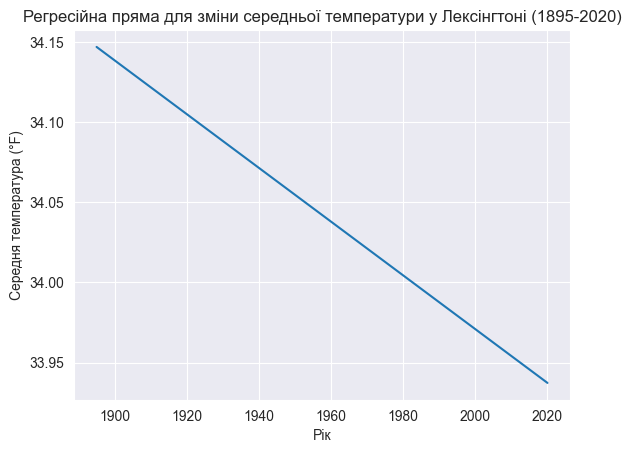

In [14]:
sns.set_style('darkgrid')
plt.plot(lex_filtered.Date, linear_regression.slope * lex_filtered.Date + linear_regression.intercept)
plt.title('Регресійна пряма для зміни середньої температури у Лексінгтоні (1895-2020)')
plt.xlabel('Рік')
plt.ylabel('Середня температура (°F)')
plt.show()

In [15]:
for year in range(2019, 2025):
    print(f"{year} —", linear_regression.slope * year + linear_regression.intercept, "(˚F)")

2019 — 33.93895933008373 (˚F)
2020 — 33.93728283964504 (˚F)
2021 — 33.935606349206346 (˚F)
2022 — 33.93392985876765 (˚F)
2023 — 33.93225336832896 (˚F)
2024 — 33.93057687789026 (˚F)


In [16]:
for year in range(1889, 1895):
    print(f"{year} —", linear_regression.slope * year + linear_regression.intercept, "(˚F)")

1889 — 34.15690308711411 (˚F)
1890 — 34.15522659667541 (˚F)
1891 — 34.153550106236715 (˚F)
1892 — 34.151873615798024 (˚F)
1893 — 34.15019712535933 (˚F)
1894 — 34.14852063492063 (˚F)


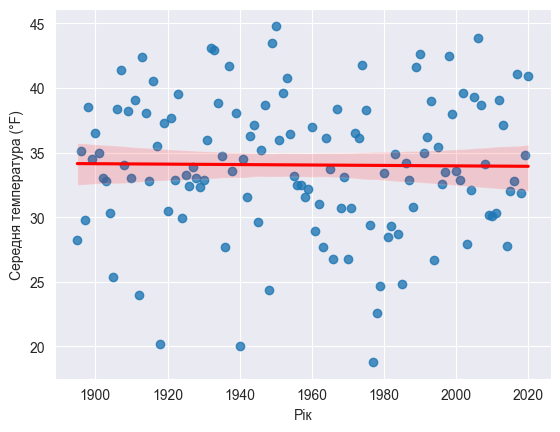

In [17]:
sns.regplot(x=lex_filtered.Date, y=lex_filtered.Temperature, line_kws={"color": "red"})
plt.xlabel('Рік')
plt.ylabel('Середня температура (°F)')
plt.show()

(5.0, 60.0)

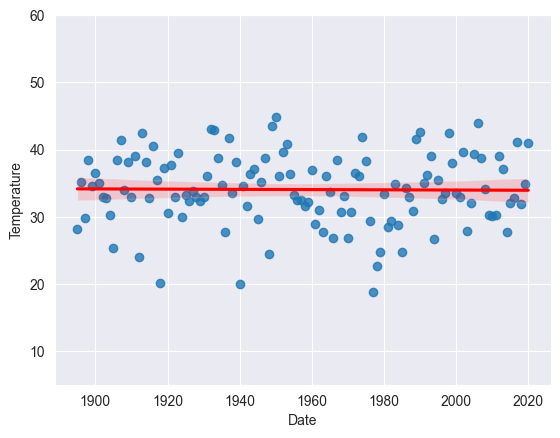

In [18]:
sns.regplot(x=lex_filtered.Date, y=lex_filtered.Temperature, line_kws={"color": "red"})
plt.ylim(5, 60)

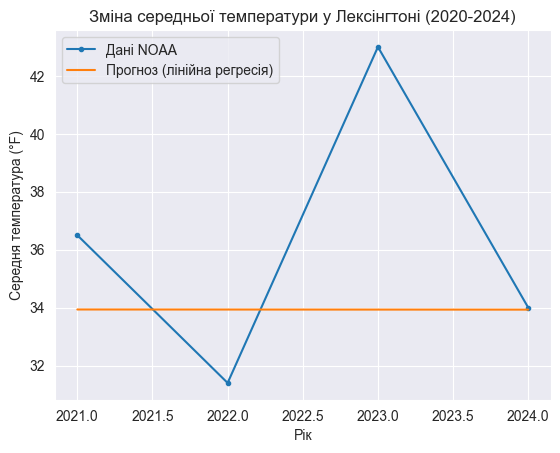

In [19]:
lex_predict = lex[lex.Date > 2020]
sns.set_style('darkgrid')
real = lex_predict.plot(x='Date', y='Temperature', style='.-', label="Дані NOAA")
estimated = plt.plot(lex_predict.Date, linear_regression.slope * lex_predict.Date + linear_regression.intercept, label="Прогноз (лінійна регресія)")
plt.title('Зміна середньої температури у Лексінгтоні (2020-2024)')
plt.xlabel('Рік')
plt.ylabel('Середня температура (°F)')
plt.legend()
plt.show()
